# **Project Name**    -

### Transform EDA to Dashboard

Project Type - EDA/AirBnb Booking Analysis

Contribution - Team

Name 1 - Rohan Dutta

Name 2 - Pranita Karmakar

# **GitHub Link:**

# **Project Summary -**

The objective of this project is to perform an exploratory data analysis (EDA) on Airbnb data using Tableau, with the aim of gaining insights into pricing trends, property characteristics, and user behavior in the Airbnb ecosystem.
By summarizing the project in this way, we can effectively communicate the objectives, methods, findings, and visualizations of your Airbnb analysis in Tableau Dashboard to stakeholders and other interested parties.

# **Problem Statement**

**In the context of Airbnb operations, how can the utilisation of Tableau facilitate a comprehensive comparative examination between Chicago and New Orleans, two diverse urban environments?
This inquiry seeks to leverage Tableau's visual analytics capabilities to uncover and illustrate the shared attributes, disparities, and distinctive patterns inherent to Airbnb's presence in these cities, thus elevating the depth and insightfulness of the study.**

#### **Define Your Business Objective?**

Create Stunning Tableau Dashboard from the same dataset on which EDA was performed for the capstone project. Which will give us meaningful insights.

## Let's Begin!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df1 = pd.read_csv('/content/listings.csv')
df2 = pd.read_csv('/content/listings (1).csv')

In [ ]:
df = pd.concat([df1,df2], ignore_index=True)

In [ ]:
df.head().style.background_gradient(cmap ="Pastel1")

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,neighbourhood_group
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed · 1 shared bath,2613,Rebecca,Hyde Park,41.787900,-87.587800,Private room,129,3,220,2023-06-10,2.140000,1,350,19,nan,nan
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1 bed · 1 bath,17928,Sarah,West Town,41.901660,-87.680210,Entire home/apt,94,32,493,2023-05-28,2.900000,1,295,44,R21000075737,nan
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · 1 shared bath,11231030,Erik,West Lawn,41.782250,-87.728060,Private room,39,1,335,2023-05-31,3.110000,2,196,6,nan,nan
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · 6 beds · 1 bath,3920450,Vas,Logan Square,41.931150,-87.718360,Entire home/apt,100,32,27,2022-12-01,0.220000,4,198,3,City registration pending,nan
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · 2 beds · 1 bath,33004,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,219,4,66,2023-06-07,0.590000,7,94,19,2209984,nan


In [ ]:
# dataset rows and columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'neighbourhood_group'],
      dtype='object')

In [ ]:
df.shape

(14807, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14807 entries, 0 to 14806
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14807 non-null  int64  
 1   name                            14807 non-null  object 
 2   host_id                         14807 non-null  int64  
 3   host_name                       14807 non-null  object 
 4   neighbourhood                   14807 non-null  object 
 5   latitude                        14807 non-null  float64
 6   longitude                       14807 non-null  float64
 7   room_type                       14807 non-null  object 
 8   price                           14807 non-null  int64  
 9   minimum_nights                  14807 non-null  int64  
 10  number_of_reviews               14807 non-null  int64  
 11  last_review                     12257 non-null  object 
 12  reviews_per_month               

In [ ]:
#Duplicates
df.duplicated().sum()

0

In [ ]:
#Missing values
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2550
reviews_per_month                  2550
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            3440
neighbourhood_group               14807
dtype: int64

In [ ]:
(df.isnull().sum()/len(df))*100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       17.221584
reviews_per_month                 17.221584
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           23.232255
dtype: float64

The chart  below shows the count of missing values


<Axes: >

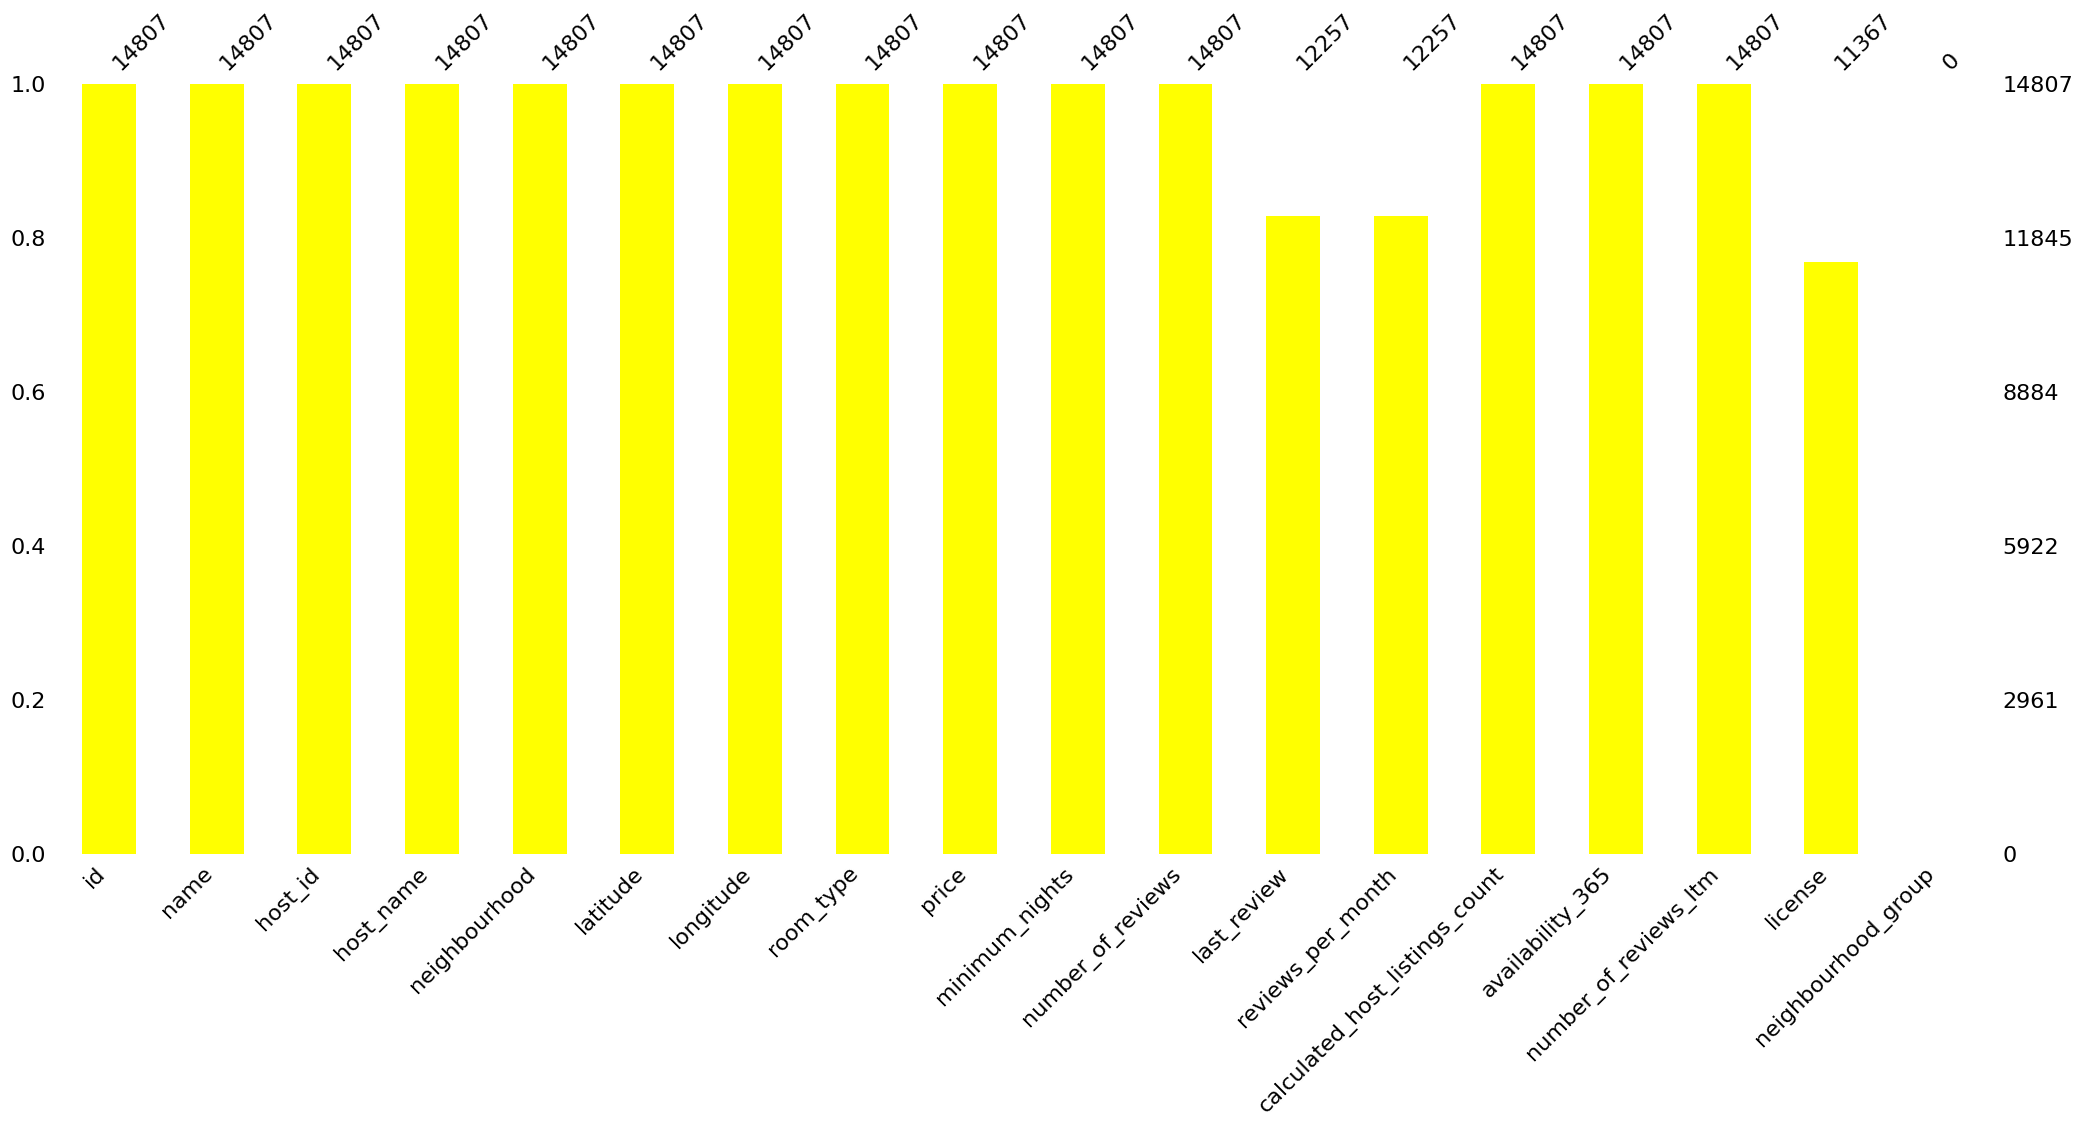

In [ ]:
# Visualizing the missing values
print('The chart  below shows the count of missing values')
msno.bar(df,color='Yellow')

In [ ]:
# Create a copy of the DataFrame
imputed_df = df.copy()

# Impute missing values in the 'last_review' column
imputed_df['last_review'].fillna('2000-01-01', inplace=True)

# Impute missing values in the 'reviews_per_month' column with the median
median_reviews_per_month = df['reviews_per_month'].median()
imputed_df['reviews_per_month'].fillna(median_reviews_per_month, inplace=True)

# Impute missing values in the 'license' column with 'No License'
imputed_df['license'].fillna('No License', inplace=True)


In [ ]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14807.0,2.986544e+17,3.727153e+17,2384.00000,2.910562e+07,4.973069e+07,7.059173e+17,9.717562e+17
host_id,14807.0,1.724163e+08,1.611634e+08,971.00000,3.534246e+07,1.074344e+08,2.904318e+08,5.332983e+08
latitude,14807.0,3.642673e+01,5.947081e+00,29.89768,2.996312e+01,4.179126e+01,4.190032e+01,4.202220e+01
longitude,14807.0,-8.876735e+01,1.202136e+00,-90.13748,-9.007213e+01,-8.772281e+01,-8.765453e+01,-8.752954e+01
price,14807.0,2.066481e+02,2.918220e+02,0.00000,9.100000e+01,1.410000e+02,2.300000e+02,1.000000e+04
minimum_nights,14807.0,1.542237e+01,3.423432e+01,1.00000,2.000000e+00,3.000000e+00,3.000000e+01,1.125000e+03
number_of_reviews,14807.0,5.478915e+01,9.125114e+01,0.00000,2.000000e+00,2.000000e+01,7.000000e+01,3.194000e+03
reviews_per_month,12257.0,1.841995e+00,1.810434e+00,0.01000,5.500000e-01,1.480000e+00,2.660000e+00,5.714000e+01
calculated_host_listings_count,14807.0,3.893246e+01,1.336860e+02,1.00000,1.000000e+00,3.000000e+00,1.400000e+01,6.550000e+02
availability_365,14807.0,1.912727e+02,1.265547e+02,0.00000,7.900000e+01,1.800000e+02,3.150000e+02,3.650000e+02


In [ ]:
# Checking for Unique values
def unique_values(x):
  return df[x].unique()
for i in df:
  if i == 'neighbourbood' or i == 'reviews_per_month' or i == 'price':
    continue
else:
  print('-'*50)
  print(''*50)
  print('unique values of',i)
  print(unique_values(i))
  print('-'*50)
  print('-'*50)

--------------------------------------------------

unique values of neighbourhood_group
[nan]
--------------------------------------------------
--------------------------------------------------


## Data Wrangling

In [ ]:
# Since Neighbourhood neighbourhood_group is nill hence we are dropping that
df = df.drop("neighbourhood_group",axis=1)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


In [ ]:
df.skew()

<ipython-input-47-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


id                                 0.519944
host_id                            0.762216
latitude                          -0.168081
longitude                         -0.167025
price                             13.947773
minimum_nights                    19.987326
number_of_reviews                  5.861654
reviews_per_month                  5.599734
calculated_host_listings_count     4.316114
availability_365                  -0.128611
number_of_reviews_ltm              9.163808
dtype: float64

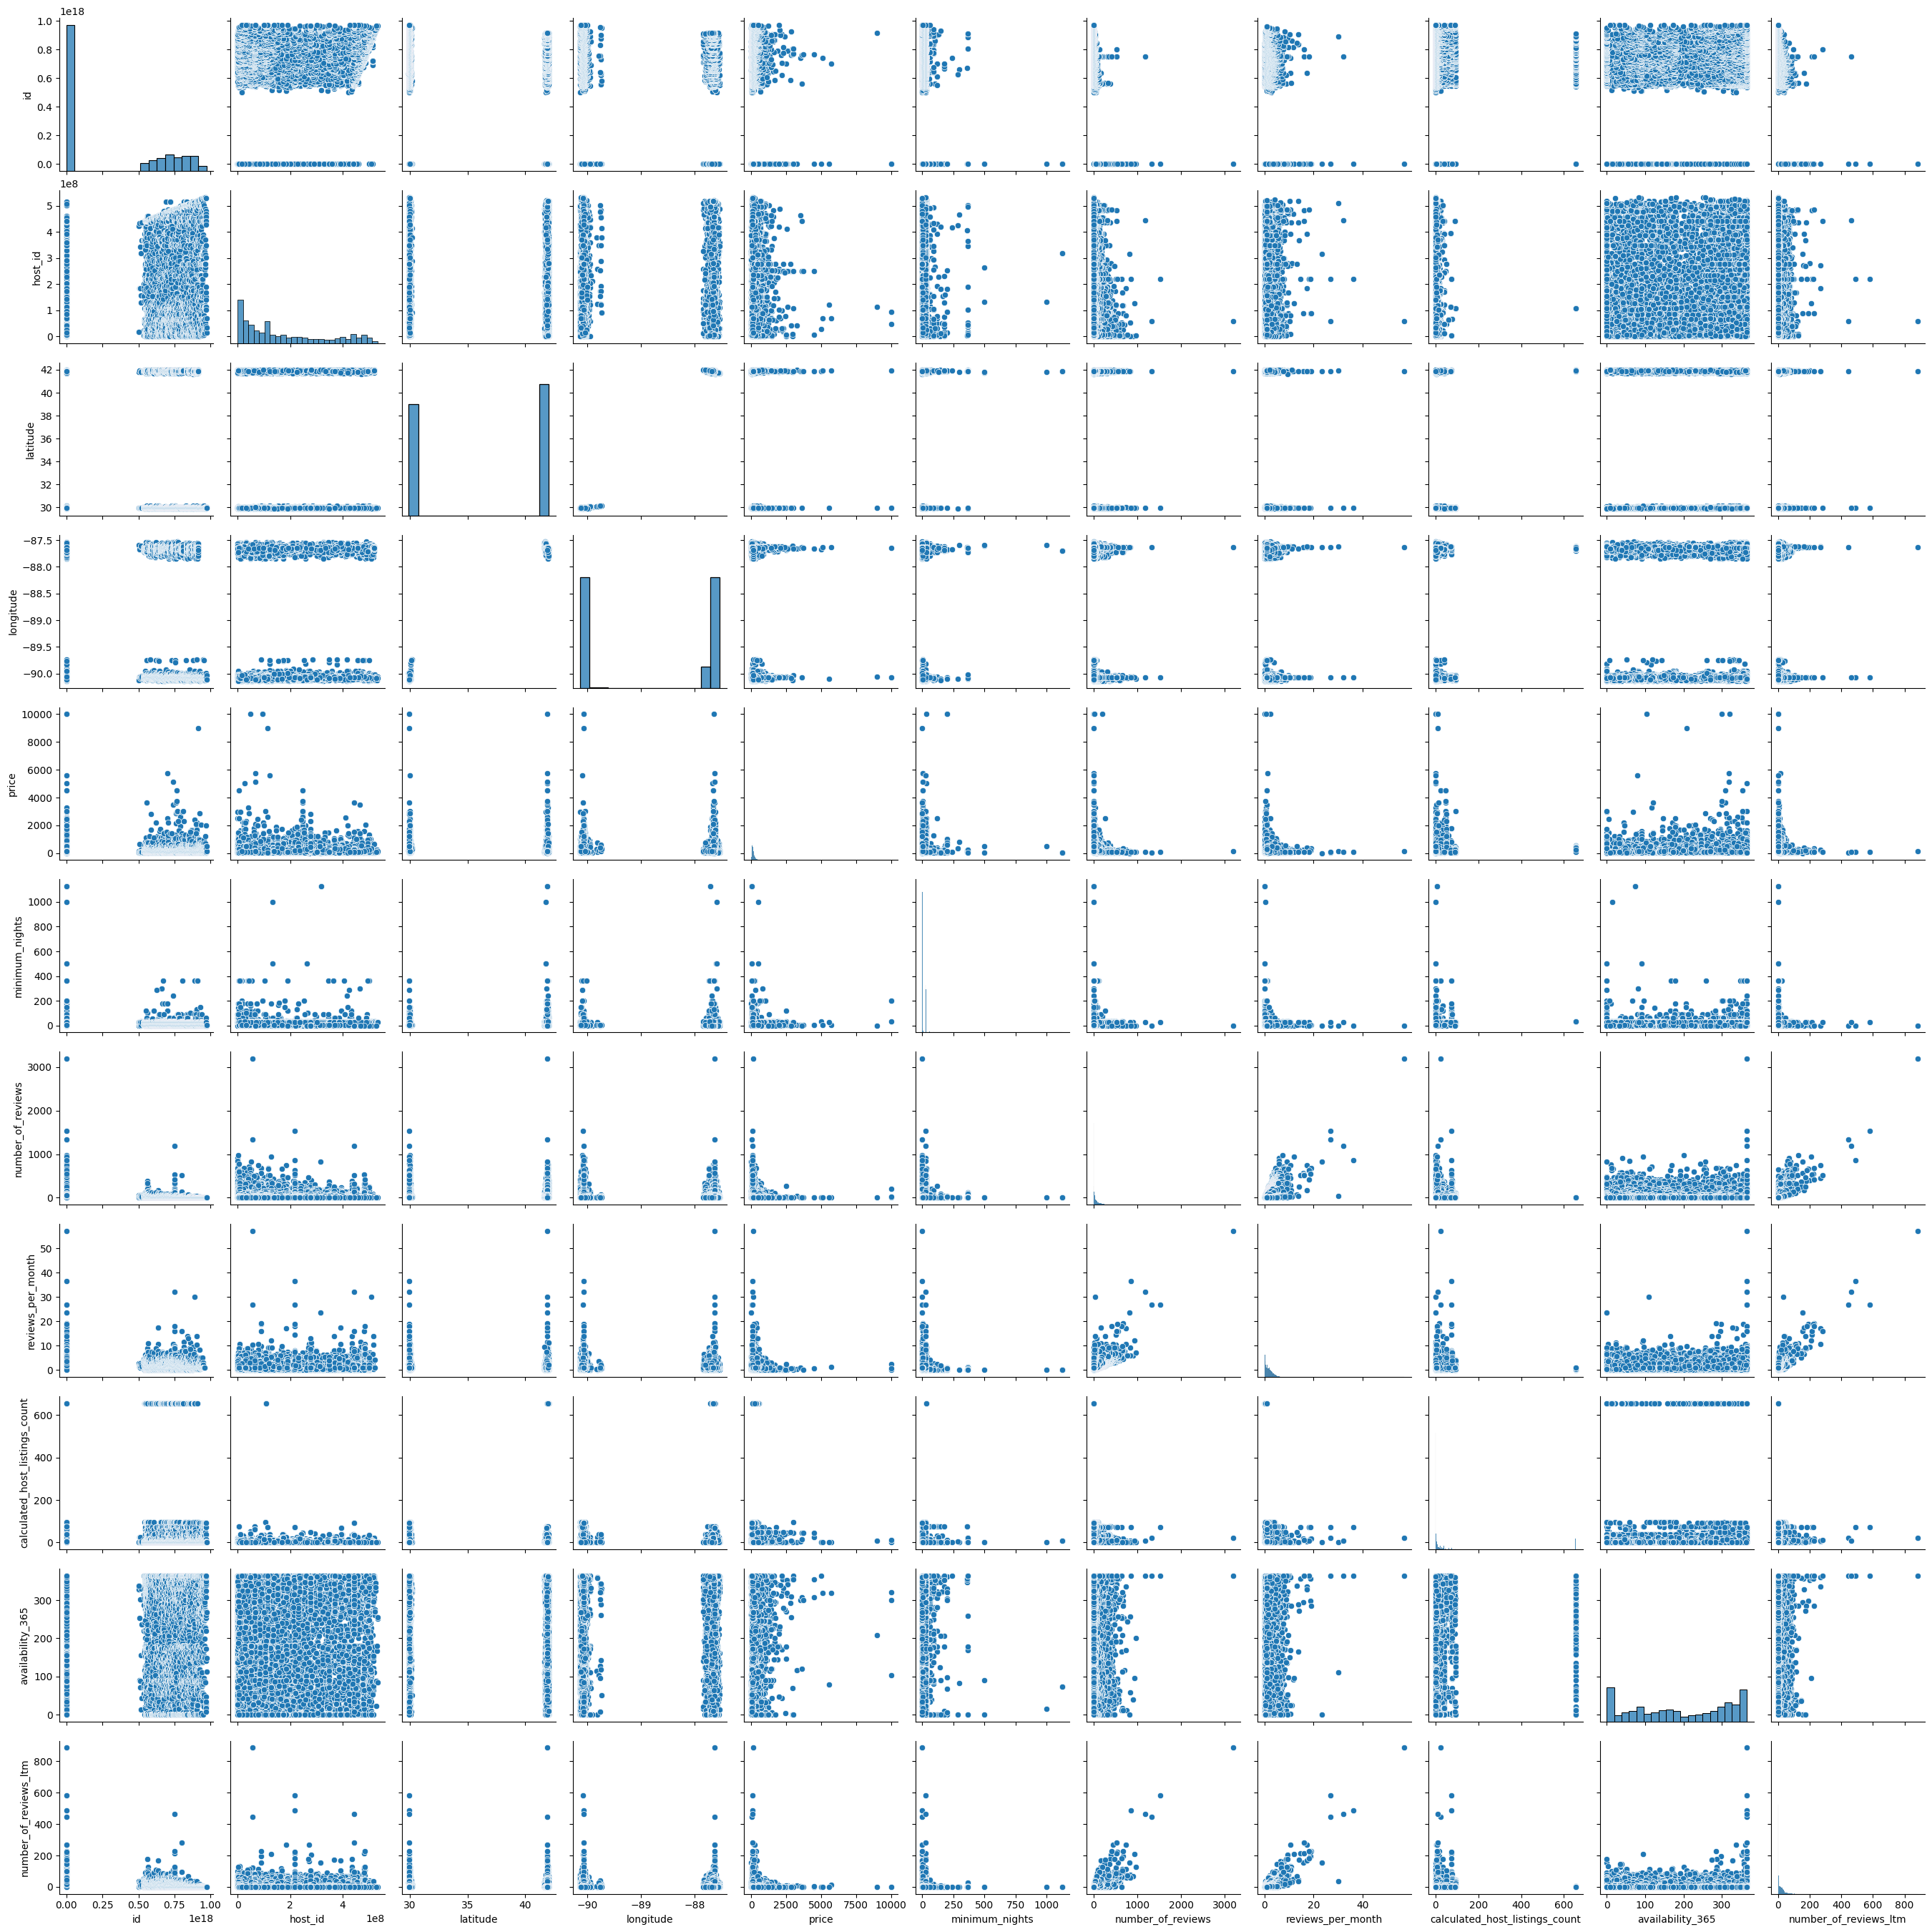

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)

    return outliers

In [ ]:
outliers_id = detect_outliers(df1['id'])
outliers_host_id = detect_outliers(df1['host_id'])
outliers_latitude = detect_outliers(df1['latitude'])
outliers_longitude = detect_outliers(df1['longitude'])
outliers_price = detect_outliers(df1['price'])
outliers_minimum_nights = detect_outliers(df1['minimum_nights'])
outliers_number_of_reviews = detect_outliers(df1['number_of_reviews'])
outliers_reviews_per_month = detect_outliers(df1['reviews_per_month'])
outliers_calculated_host_listings_count = detect_outliers(df1['calculated_host_listings_count'])
outliers_availability_365 = detect_outliers(df1['availability_365'])
outliers_number_of_reviews_ltm = detect_outliers(df1['number_of_reviews_ltm'])

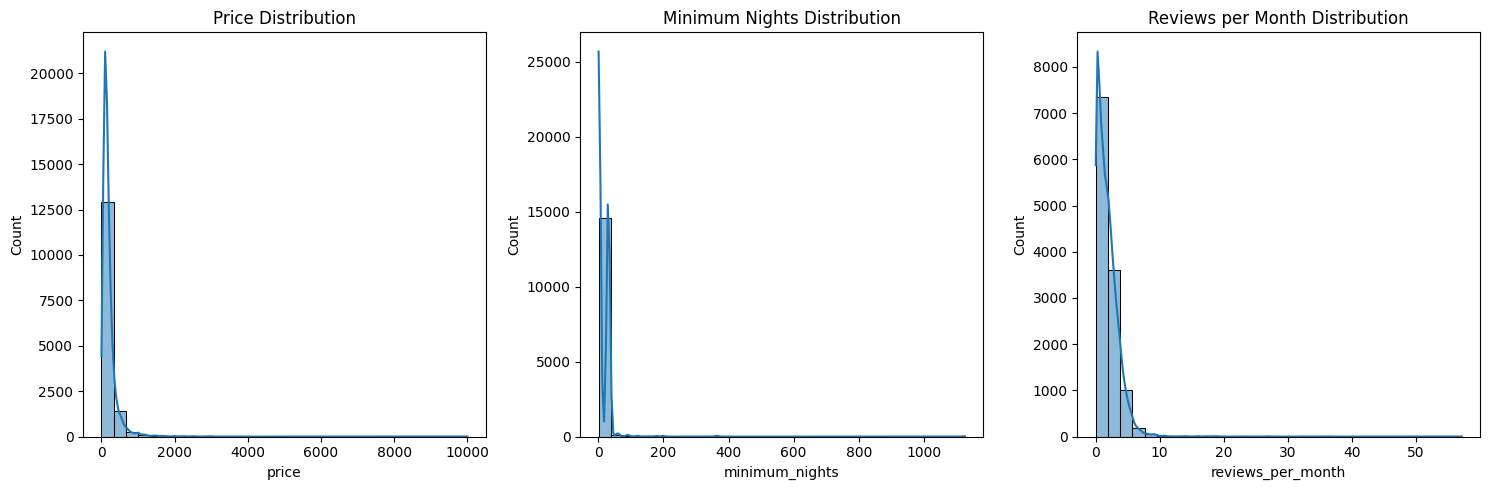

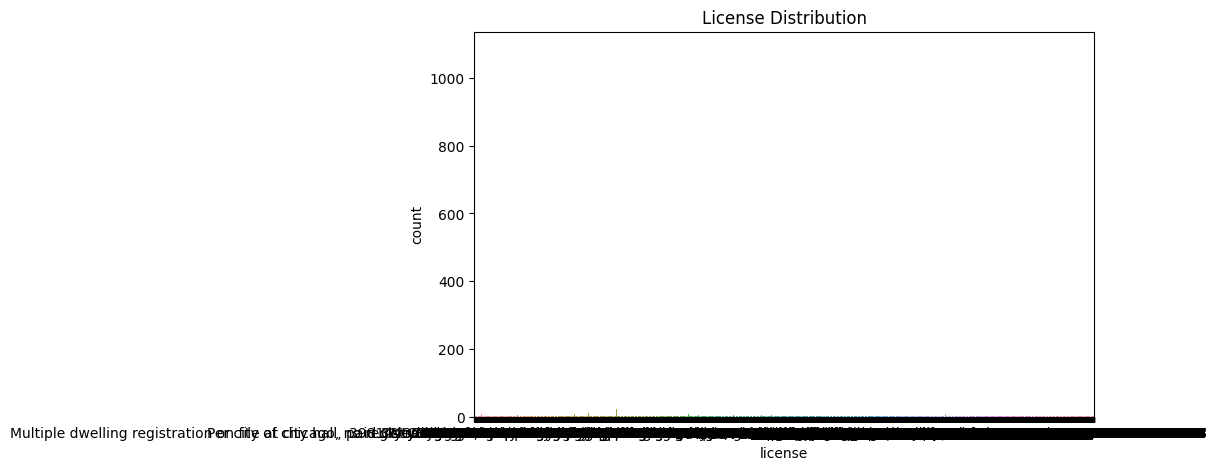

In [ ]:
# Since our data is skewed hence we are immputing
imputed_df = df.copy()
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(imputed_df['price'], bins=30, kde=True)
plt.title('Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(imputed_df['minimum_nights'], bins=30, kde=True)
plt.title('Minimum Nights Distribution')

plt.subplot(1, 3, 3)
sns.histplot(imputed_df['reviews_per_month'], bins=30, kde=True)
plt.title('Reviews per Month Distribution')

plt.tight_layout()

# Plot a bar chart for the license column
plt.figure(figsize=(8, 5))
sns.countplot(data=imputed_df, x='license')
plt.title('License Distribution')

# Show the plots
plt.show()

# Project Link :
 https://public.tableau.com/app/profile/rohan.dutta7400/viz/OverviewDashboardAirBnb/OverviewofAirBnb?publish=yes

# Conclusion :
In conclusion, the Airbnb Analysis Tableau Project has successfully provided a comprehensive and visually engaging analysis of Airbnb's rental listings and user interactions. Through Tableau's data visualization capabilities, we have gained valuable insights into property occupancy rates, pricing trends, and user reviews. These insights empower Airbnb hosts and management to make data-driven decisions, improving property listings, optimizing pricing strategies, and enhancing customer engagement. By delving into data patterns, location preferences, and user demographics, this project has contributed to improving the overall Airbnb experience for hosts and guests alike. It underscores the significance of data analysis and visualization in the hospitality industry for informed decision-making and continued growth.